<h1>Содержание сборного проекта. Игровые платформы.<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Выдвижение-и-проверка-гипотез" data-toc-modified-id="Выдвижение-и-проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выдвижение и проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>


# Исследование 

- Исследование на тему определения оптимальных рекламных подходов для магазина "Стримчик".
- Данные: данные до 2016 года, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation ): ***/datasets/games.csv.***
- Задача: выявить определяющие успешность игры закономерности для 
- Цель - поиск перспективного продукта для его продвижения и планирования рекламных кампаний.


## Изучение данных из файла

Импортируем библиотеки

In [1]:
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from scipy import stats as st
import math
import warnings
from scipy.stats import levene
import seaborn as sns
from functools import reduce
warnings.filterwarnings('ignore')

Открываем файл:

In [2]:
df = pd.read_csv('https://www.dropbox.com/s/bm0n64yuu7cy4dt/1st_games.csv?dl=1')  

Знакомимся с файлом методом info(), смотрим первые 10 строк фрейма:

In [3]:
display (df.head(10))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Первое знакомство показало:
- 16715 строк, 11 столбцов
- разнорегистровые название столбцов
- наличие пропущенных значений (столбцы с оценками, рейтинг, жанр, имя, год)
- несоответствие типов данных требуемым (год, оценки)


Рассмотрим данные с помощью метода describe() 

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

Данные, представленные во фрейме имеют пропущенные значения, строковые значения в столбцах, предполагающих вещественные числа (в частности 'user_score'), а также пропуски в столбцах с различными типами. Используем косвенные данные (заполненные) для заполнения пропусков и строковых значений. Метод describe не дал полной картины, по причине строковых значений в некоторых столбцах (user_score). Перейдём к предобработке данных.

## Предобработка данных

Ознакомимся подробнее с названиями столбцов фрейма.

In [5]:
print('Столбцы до обработки:', df.columns ) #вернём текущие названия столбцов

Столбцы до обработки: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Приведём названия столбцов в нижний регистр

In [6]:
df.columns = (['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
      'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']) #изменим регистр столбцов 

In [7]:
print ( 'Столбцы после обработки', df.columns)

Столбцы после обработки Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Изменение названий столбцов прошло успешно.

Рассмотрим пропущенные значения в столбце 'year_of_release'

Рассмотрим столбец 'year_of_release' Видимых зависимостей в фрейме с пропущенными значениями года выпуска не обнаружено. Удаление не приведёт к существенным искажениям данных фрейма для дальнейшего исследовательского и статистического анализа. Удалим строки c пропусками в столбцах:
- year_of_release
- name
- genre
по условию с методом **.drop()**

In [8]:
df = df.drop(df[df['year_of_release'].isnull()].index) #удаление строк столбца год по условию
df = df.drop(df[df['name'].isnull()].index) #удаление строк столбца имя по условию
df = df.drop(df[df['genre'].isnull()].index) #удаление строк столбца жанр по условию

Изменяем тип данных столбца с годом на целочисленный.

In [9]:
df['year_of_release'] = df['year_of_release'].astype('int64')


In [10]:
df.name.value_counts().head(10)

Need for Speed: Most Wanted                12
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
Lego Batman 3: Beyond Gotham                8
Madden NFL 08                               8
LEGO Star Wars II: The Original Trilogy     8
LEGO Jurassic World                         8
Madden NFL 07                               8
Monopoly                                    8
Name: name, dtype: int64

Рассмотрим повторяющиеся значения столбца с именем 

In [11]:
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


***Промежуточный вывод:*** Данные по Need for Speed: Most Wanted, LEGO Marvel Super Heroes и другим, показывают, что повторяющиеся релизы (на разных платформах) целесообразно заполнить средними **значениями продукта по всем платформам.**

Необходимо заменить тип данных в столбце user_score для осуществления расчётов, однако мешает присутствие строк.

In [12]:
#df['user_score'] = df['user_score'].astype('float64') #изменение типа данных в столбце user_score невозможно, в данных присутствуют строки
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


По условиям проекта, в столбце user_score есть строки "tbd", при этом в количестве 2376 строк. Это, вероятно, означает "в ожидании данных". Заменим их по принципу схожему с заполнением пропущенных значений: ищем среднее по продукту на всех платформах.

На случай отсутствия данных по различным платформам определим альтернативный метод для заполнения пропущенных значений. Предположительно, это возможно сделать с помощью данных critic_score. Чтобы определить возможность заполнения таким методом, определим корелляцию между столбцами фрейма (c заполненными данными, без строковых значений) для поиска линейно связанных данных.

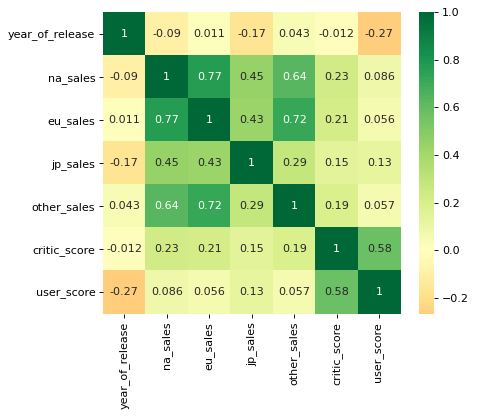

In [13]:

df_corr = df.query('user_score != "tbd"') #исключаем tbd из столбца фрейма 'user_score'
df_corr['user_score'] = df_corr['user_score'].astype('float64') #преобразуем тип данных для построения рисунка



plt.figure(figsize=(6,5), dpi= 80) #определяем размер
#строим график в красножелтозелёной гамме
sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns, yticklabels=df_corr.corr().columns, cmap='RdYlGn', center=0, annot=True) 
plt.show()


Как видно из граффика - ожидаемо присутствует сильная корелляция между оценкой критиков и оценков пользователей. В качестве альтернативного способа заполнения пропущенных значений определим следующей логики: *** (средний балл пользователей / средний балл критиков) * средний балл критиков***
Для начала найдём отношение средних баллов, для этого приведём все оценки в 100 бальную систему.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.0+ MB


In [15]:
#добавим средние значения оценки пользователей по фрейму 

mean_user_scores = df_corr.pivot_table(index = 'name', values = 'user_score') #сводим таблицу для поиска средних значений по именам

mean_user_scores.reset_index(col_level=True) #обнуляем двухэтажные имена столбцов



df = pd.merge(df,mean_user_scores, how = 'outer', on = 'name' ) #сцепляем таблицы с средними по продукту и генеральным фреймом по имени
#df.query('name == "Need for Speed: Most Wanted"') #проверяем

mean_relative_score = (df_corr['user_score'].mean() * 10) / df_corr['critic_score'].mean() #ищем соотношение средних оценок критиков и пользователей
print ('средняя оценка по пользователям выше в', mean_relative_score ,'раз, чем оценка критиков') #числитель умножаем на 10 для приведения в сопоставимые величины

средняя оценка по пользователям выше в 1.0144424250223263 раз, чем оценка критиков


In [16]:
df.columns #возвращаем имена столбцов для проверки
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'user_score_mean'] #убираем задвоенные 
df.info() #проверяем корректность столбцов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  user_score_mean  8524 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Похожим образом заполним значения tbd средними значениями игры на разных платформах, если такой возможности нет - примем оценку критиков, увеличенную в 1.0144 раз 

Заменим данные tbd и NaN исходя из следующей логики: значение меняем в соответствии с средней оценкой user_score_mean критической оценкой (равное critic_score/1,0144), если критическое значение также пропущено, заменияем tbd на пропущенное значение. **Используем where.**

In [17]:
df['user_score'] = np.where(df['user_score'] == 'tbd' , df['user_score_mean'], df['critic_score'] * mean_relative_score)
df['user_score'] = np.where(df['user_score'].isnull() == True , df['user_score_mean'], df['critic_score'] * mean_relative_score)

аналогичным образом заполняем пропущенные в critic_score (с помощью обратной пропорции)

In [18]:
display (df.query('user_score == "tbd"')) #проверяем замену 
#df.info()
df['critic_score'] = np.where(df['critic_score'].isnull() == True , df['user_score'] / mean_relative_score , df['user_score_mean'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_mean


In [19]:
df.user_score = df.user_score.astype('float64') #меняем типы данных оценки пользователей на веществ. число.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     8219 non-null   float64
 9   user_score       8241 non-null   float64
 10  rating           9768 non-null   object 
 11  user_score_mean  8524 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Промежуточные выводы данные в главном фрейме df приведены в нужный формат, заполнены некоторые пропуски. Для упрощения анализа приведём столбцы с оценками к единой метрике (100 баллов).

In [20]:
df['user_score'] = df['user_score']*10 #приводим значения столбцов к единому виду (100 балльная система)

Создадим новый фрейм, с полностью заполненными строками

In [21]:
df_clear = df.query('user_score != "NaN" & critic_score != "NaN" & rating != "NaN"')  #вводим новый "чистый" фрейм без пропущенных значений для аналищза
df_clear.info()
#df_clear.query('rating.isnull() == True') #проверим данные с рейтингами

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     8219 non-null   float64
 9   user_score       8241 non-null   float64
 10  rating           9768 non-null   object 
 11  user_score_mean  8524 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Найдём наиболее распространённые оценки в жанрах для заполнения пропущенных значений.

In [22]:
print ('____________Action___________')
print (df_clear.query('genre == "Action"')['rating'].value_counts().head(2))
print ('____________Sports___________')
print (df_clear.query('genre == "Sports"')['rating'].value_counts().head(2))
print ('____________Shooter___________')
print (df_clear.query('genre == "Shooter"')['rating'].value_counts().head(2))
print ('____________Role-Playing___________')
print (df_clear.query('genre == "Role-Playing"')['rating'].value_counts().head(2))
print ('____________Racing___________')
print (df_clear.query('genre == "Racing"')['rating'].value_counts().head(2))
print ('____________Misc___________')
print (df_clear.query('genre == "Misc"')['rating'].value_counts().head(2))
print ('____________Platform___________')
print (df_clear.query('genre == "Platform"')['rating'].value_counts().head(2))
print ('____________Fighting___________')
print (df_clear.query('genre == "Fighting"')['rating'].value_counts().head(2))
print ('____________Simulation___________')
print (df_clear.query('genre == "Simulation"')['rating'].value_counts().head(2))
print ('____________Adventure___________')
print (df_clear.query('genre == "Adventure"')['rating'].value_counts().head(2))
print ('____________Strategy___________')
print (df_clear.query('genre == "Strategy"')['rating'].value_counts().head(2))
print ('____________Puzzle___________')
print (df_clear.query('genre == "Puzzle"')['rating'].value_counts().head(2))

____________Action___________
T    670
M    596
Name: rating, dtype: int64
____________Sports___________
E    1162
T     195
Name: rating, dtype: int64
____________Shooter___________
M    553
T    340
Name: rating, dtype: int64
____________Role-Playing___________
T    415
M    161
Name: rating, dtype: int64
____________Racing___________
E    576
T    167
Name: rating, dtype: int64
____________Misc___________
E    449
T    228
Name: rating, dtype: int64
____________Platform___________
E       354
E10+    141
Name: rating, dtype: int64
____________Fighting___________
T    357
M     48
Name: rating, dtype: int64
____________Simulation___________
E    321
T    186
Name: rating, dtype: int64
____________Adventure___________
E    159
T    114
Name: rating, dtype: int64
____________Strategy___________
T       160
E10+     76
Name: rating, dtype: int64
____________Puzzle___________
E       284
E10+     42
Name: rating, dtype: int64


Заполним пропущенные значения рейтинга в соответствии с самым распространённой оценков в жанре.

In [23]:
def fill_rating (row):
    rate = ''
    rating = row["rating"]
    genre =  row["genre"]
    if (pd.isnull(rating) == True) & (genre == 'Action'):
        rate = 'T'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Sports'):
        rate = 'E'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Shooter'):
        rate = 'M'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Role-Playing'):
        rate = 'T'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Racing'):
        rate = 'E'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Misc'):
        rate = 'E'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Platform'):
        rate = 'E'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Fighting'):
        rate = 'T'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Simulation'):
        rate = 'T'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Adventure'):
        rate = 'M'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Strategy'):
        rate = 'T'
        return rate
    elif (pd.isnull(rating) == True) & (genre == 'Puzzle'):
        rate = 'T'
        return rate
    else:
        return rating
    
df_clear['rating'] = df_clear.apply(fill_rating, axis = 1)
df_clear.info() #vois la данные заполнены
df['rating'] = df_clear['rating'] #обновим столбец в генеральном фрейме 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     8219 non-null   float64
 9   user_score       8241 non-null   float64
 10  rating           16444 non-null  object 
 11  user_score_mean  8524 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


***Промежуточные выводы*** Генеральный фрейм df и Чистые данные нового фрейма df_clear заполнены, готовы для анализа. Анализ также показал, что существенная доля пропусков в столбцах с рейтингами и оценками критиков и пользователей возникли одновременно, что говорит о возможной системной причине пропуска во время сбора или выгрузки данных этих блоков.

рассмотрим подробнее данные в столбце user_score с помощью метода describe()

In [24]:
#df.info()
df['user_score'].describe() 

count    8241.000000
mean      638.834829
std       238.824846
min         0.000000
25%       568.087758
50%       710.109698
75%       801.409516
max       994.153577
Name: user_score, dtype: float64

Максимальные данные и средняя величины столбца user_score говорят о присутствии некорректных данных. Предположительно некоторые данные столбца были указаны в 10 кратном размере.

In [25]:
display (df.query('user_score > 100')) #обратим внимание на срез столбца user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_mean
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,8.0,770.976243,E,8.0
3,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.3,831.842789,E,8.3
4,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,811.553940,E,8.0
8,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.5,902.853758,E,8.5
9,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,6.6,588.376607,E,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
16393,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,8.5,821.698364,E,8.5
16402,E.T. The Extra-Terrestrial,GBA,2001,Action,0.01,0.00,0.00,0.00,2.4,466.643516,E,2.4
16430,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,5.8,618.809879,T,5.8
16436,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,7.2,608.665455,E10+,7.2


Данные оценки - превышают максимум (**100**) в несколько раз. Для более подробного анализа построим частотную гистограмму для более подробной оценки столбца user_score

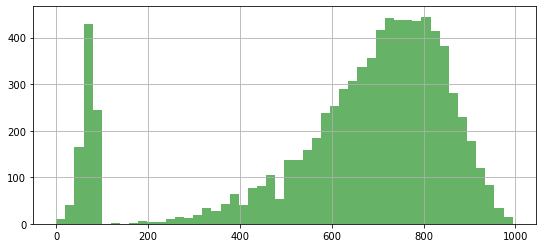

In [26]:
df['user_score'].hist(bins = 50, figsize = (9, 4),color='green',alpha = 0.6)
plt.show()

Очевидно, что на графике 2 распределения, что подтверждает наличие ошибки (некоторые 10 кратные значения столбца)

Следуя предположению поделим на 10, значения, превышающие 100 баллов в стобце user_score с помощью метода score

In [27]:
df['user_score'] = np.where(df['user_score'] > 100, df['user_score']/10, df['user_score']) #делим некорректные значения на 10

In [28]:
df['user_score'].describe()

count    8241.000000
mean       70.497061
std        14.310769
min         0.000000
25%        61.880988
50%        72.750000
75%        81.155394
max        99.415358
Name: user_score, dtype: float64

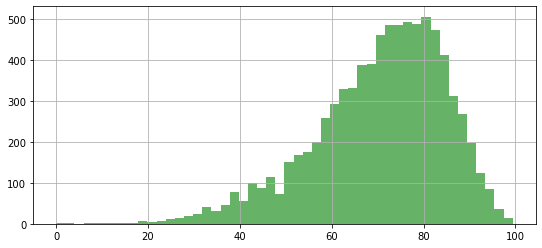

In [29]:
df['user_score'].hist(bins = 50, figsize = (9,4),color='green', alpha = 0.6)
plt.show()

Данные теперь показывают одно распределение скошенное влево. Распределение характерное для совокупности балльных оценок.

**Рассмотрим данные столбца 'name' **

Первое знакомство с помощью метода показывает наличие дубликатов по имени. Предположительно связано с релизами на различных платформах и годами релизов. Оценим наличие дубликатов сразу по 3м критериям:

In [30]:
isdupli_df = df.duplicated(subset=['name', 'platform','year_of_release'])
isdupli_df[isdupli_df == True]

942    True
dtype: bool

Всего 1 дубликат одновременно по 3м критериям. 

In [31]:
df = df.drop(df[df.index == 942].index).reset_index() #Удаляем полный дубликат


### Вывод

Данные предобработаны. Создан дополнительный "чистый" фрейм для дальнейшей работы. Данные не потеряли критического объёма в процессе предобработки и готовы для добавления расчётов и проведения исследовательского и статистического анализа.

## Расчёты и добавление результатов в таблицу

Добавим новый столбец в фрейм df с общей выручкой по каждому продукту.

In [32]:
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['eu_sales'] + df['other_sales']
display(df.head(10)) #проверим корректность данных
df.info()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_mean,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,8.0,77.097624,E,8.0,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,NaN,40.24
2,2,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,E,NaN,5.07
3,3,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.3,83.184279,E,8.3,35.52
4,4,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,81.155394,E,8.0,32.77
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,NaN,31.38
6,6,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,T,NaN,30.26
7,7,Tetris,NES,1988,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,T,NaN,5.58
8,8,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.5,90.285376,E,8.5,29.80
9,9,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,6.6,58.837661,E,6.6,28.91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  int64  
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     8218 non-null   float64
 10  user_score       8240 non-null   float64
 11  rating           16443 non-null  object 
 12  user_score_mean  8523 non-null   float64
 13  total_sales      16443 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 1.8+ MB


### Вывод

Данные добавлены корректно. Столбец отображает суммарную выручку. Пропущенных данных нет.

## Исследовательский и статистический анализ данных

Рассмотрим данные по выпуску игр в разные периоды для определения необходимости анализа каждого года из представленных.

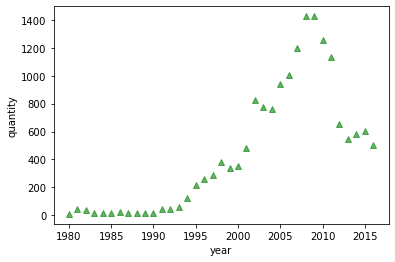

In [33]:
count_year = df.groupby('year_of_release')['year_of_release'].count().sort_values(ascending = False)
plt.plot(count_year.index, count_year, 'g^', alpha = 0.6)
plt.xlabel("year")    
plt.ylabel("quantity") 
plt.show()

Исследование данных до 1995 года - представляет малую исследовательскую ценность по причинам малой выборки данных. С 1995 года начинается замедление относительного прироста количества игр. Определим этот год как "пограничный" для начала исследования.

In [34]:
df = df.query('year_of_release >= 1995')
df_clean = df_clear.query('year_of_release >= 1995')

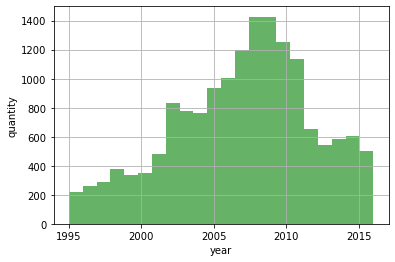

In [35]:
df.year_of_release.hist(bins = 22, color = "green", alpha = 0.6) #22 корзинки нужны для равномерного отображения гистограммы за 22 года
plt.xlabel("year")    
plt.ylabel("quantity") 
plt.show()

Определим 10 платформ с наибольшей выручкой

In [36]:
df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).reset_index().head(10)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.76
5,PS,721.55
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Введём новые переменные с количественными данными продуктов исходя из года и платформы.

<div class="alert alert-info"> <b>Попытался разместить в 2 ряда</b> Ничего не вышло, прошу разъяснить в чём проблема. Спасибо</div>

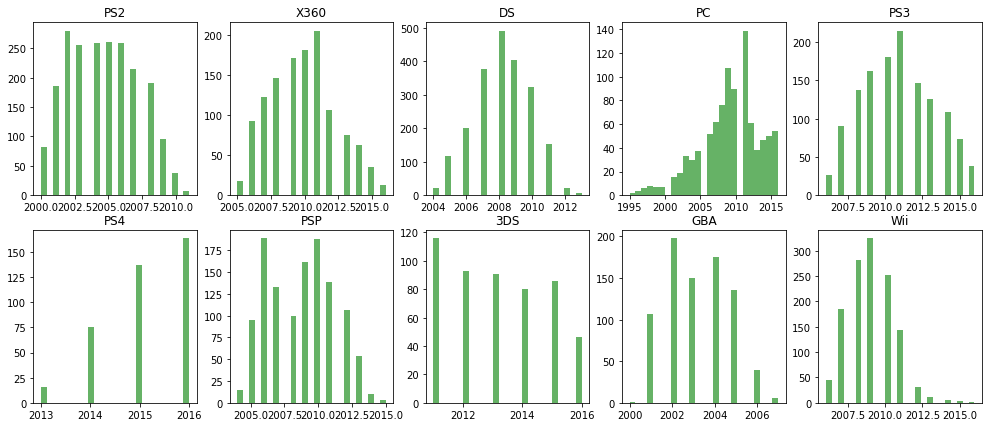

In [38]:
platform_list = ['PS2','X360','DS','PC', 'PS3','PS4','PSP','3DS','GBA','Wii']

plt.figure(figsize=(17,7))
i=1

for plat in platform_list:
    plt.subplot(2, 5, i)
    plt.hist(df[df['platform']==plat]['year_of_release'] ,bins=25,color = "green", alpha = 0.6)
    plt.title(plat)
    i+=1

plt.show()

Жизненный цикл платформ предпочтительнее рассчитывать исходя из данных по выпуску продуктов с распределением, близким к нормальному, чтобы увидеть появление, развитие, стагнацию и исчезновение. Такое распределение встречается на распределении платформ:
- PS2
- X360
- PS3
- Wii
- DS
- PSP
- GBA

Определим жизненный цикл (размах распределений) игровых платформ.

In [40]:
def amplitude (series): #функция для определения жизненного цикла
    amp = series.max() - series.min() #определим размах как разность максимального и минимального значений
    return amp


In [41]:
print ('Жизненный цикл платформ:')
print ("PS2:", amplitude(PS2), 'лет')
print ("X360:", amplitude(X360), 'лет')
print ("PS3:", amplitude(PS3), 'лет')
print ("Wii:", amplitude(Wii), 'лет')
print ("DS:", amplitude(DS), 'лет')
print ("PSP:", amplitude(PSP), 'лет')
print ("GBA:", amplitude(GBA), 'лет')

Жизненный цикл платформ:
PS2: 11 лет
X360: 11 лет
PS3: 10 лет
Wii: 10 лет
DS: 9 лет
PSP: 11 лет
GBA: 7 лет


Определим среднее арифметическое значение жизненного цикла: поделим сумму лет на количество платформ

In [42]:
mean_life_platform = (amplitude(PS2)+ amplitude(X360) + amplitude(PS3) + amplitude(Wii) + amplitude(DS) + amplitude(PSP) + amplitude(GBA))/7
display ('Среднее значение жизненного цикла платформ:', math.ceil(mean_life_platform) )

'Среднее значение жизненного цикла платформ:'

10

***Промежуточный вывод:*** любовь живёт 3 года, а любовь к платформам - 10 лет.

Определим актуальный период для исследования и прогнозирования данных 10 лет до 2016 г. Для анализа создадим сводную таблицу с выручкой по годам и платформам, оценим сумму продаж по платформам за последние 10 лет.

In [43]:
df_pivot_year_sales_platform = df.pivot_table(index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
print ('Данные выручки за последние 10 лет')
df_pivot_year_sales_platform.query('year_of_release > 2006').groupby('platform')['total_sales'].sum().sort_values(ascending = False)

Данные выручки за последние 10 лет


platform
PS3     910.37
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
3DS     257.81
PSP     183.31
PS2     162.38
PC      160.57
XOne    159.32
WiiU     82.19
PSV      53.81
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: total_sales, dtype: float64

Для разработки прогноза по перспективным платформам определим срез фрейма с растущими показателями за последний 2015 год и суммами выручки по платформам.

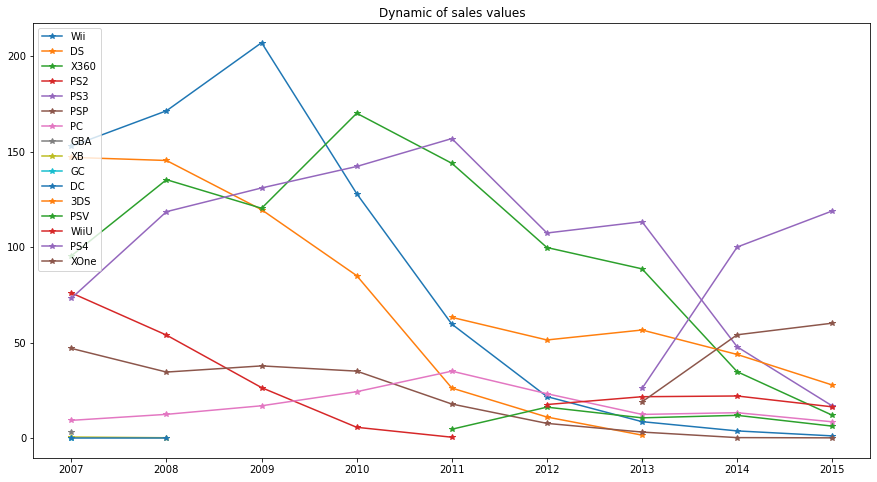

In [44]:
df_sales_2015 = df_pivot_year_sales_platform.query('year_of_release == 2015').groupby('platform')['total_sales'].sum().sort_values(ascending = False)
df_sales_2014 = df_pivot_year_sales_platform.query('year_of_release == 2014').groupby('platform')['total_sales'].sum().sort_values(ascending = False)
df_sales_2013 = df_pivot_year_sales_platform.query('year_of_release == 2013').groupby('platform')['total_sales'].sum().sort_values(ascending = False)
df_sales_2012 = df_pivot_year_sales_platform.query('year_of_release == 2012').groupby('platform')['total_sales'].sum().sort_values(ascending = False)
df_sales_2011 = df_pivot_year_sales_platform.query('year_of_release == 2011').groupby('platform')['total_sales'].sum().sort_values(ascending = False)
df_sales_2010 = df_pivot_year_sales_platform.query('year_of_release == 2010').groupby('platform')['total_sales'].sum().sort_values(ascending = False)
df_sales_2009 = df_pivot_year_sales_platform.query('year_of_release == 2009').groupby('platform')['total_sales'].sum().sort_values(ascending = False)
df_sales_2008 = df_pivot_year_sales_platform.query('year_of_release == 2008').groupby('platform')['total_sales'].sum().sort_values(ascending = False)
df_sales_2007 = df_pivot_year_sales_platform.query('year_of_release == 2007').groupby('platform')['total_sales'].sum().sort_values(ascending = False)

data_frames = [df_sales_2007,df_sales_2008,df_sales_2009,df_sales_2010,df_sales_2011,df_sales_2012 ,df_sales_2013, df_sales_2014, df_sales_2015]

df_sales_merged = reduce(lambda  left, right: pd.merge(left,right, on=['platform'], how='outer'), data_frames)
#объединяем методом reduce
#поменяем имена столбцов для наглядности
df_sales_merged.columns = ['2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014',
       '2015']
df_sales_merged.reset_index() #убираем вторые этажи
df_sales_merged = df_sales_merged.T #транспонируем для упрощения восприятия
df_sales_merged.plot(marker = '*', figsize = (15,8)) #делаем широкий график во всю страницу
plt.title('Dynamic of sales values')
plt.legend(loc = 'upper left')
plt.show()

In [45]:
df_sales_merged #оценим точные данные выручки от продаж по платформам

platform,Wii,DS,X360,PS2,PS3,PSP,PC,GBA,XB,GC,DC,3DS,PSV,WiiU,PS4,XOne
2007,152.77,146.94,95.41,75.99,73.19,46.93,9.28,3.4,0.55,0.27,0.02,NaN,NaN,NaN,NaN,NaN
2008,171.32,145.31,135.26,53.90,118.52,34.55,12.42,NaN,0.18,NaN,0.04,NaN,NaN,NaN,NaN,NaN
2009,206.97,119.54,120.29,26.40,130.93,37.78,16.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,127.95,85.02,170.03,5.64,142.17,35.04,24.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,59.65,26.18,143.84,0.45,156.78,17.82,35.03,NaN,NaN,NaN,NaN,63.20,4.63,NaN,NaN,NaN
2012,21.71,11.01,99.74,NaN,107.35,7.69,23.22,NaN,NaN,NaN,NaN,51.36,16.19,17.56,NaN,NaN
2013,8.59,1.54,88.58,NaN,113.25,3.14,12.38,NaN,NaN,NaN,NaN,56.57,10.59,21.65,25.99,18.96
2014,3.75,NaN,34.74,NaN,47.76,0.24,13.28,NaN,NaN,NaN,NaN,43.76,11.90,22.03,100.00,54.07
2015,1.14,NaN,11.96,NaN,16.82,0.12,8.52,NaN,NaN,NaN,NaN,27.78,6.25,16.35,118.90,60.14


Из графика и таблицы можно увидеть, что среди всех платформ  растут всего 2:
- PS4
- XOne

***Промежуточный вывод.*** С учётом среднего прогнозируемого жизненного цикла платформы  10 лет, а также года начала жизненного цикла 2013 - это 2 наиболее перспективные платформы для продвижения продуктов. Возникновенипе платформы WiiU в 2012 показывает стабильно-низкую выручку в сравнении с PS4 и XOne. Другие платформы показывают низкие результаты и отражают завершение своего жизненного цикла.

Построим ящики с усами с разбивкой по перспективным платформам.

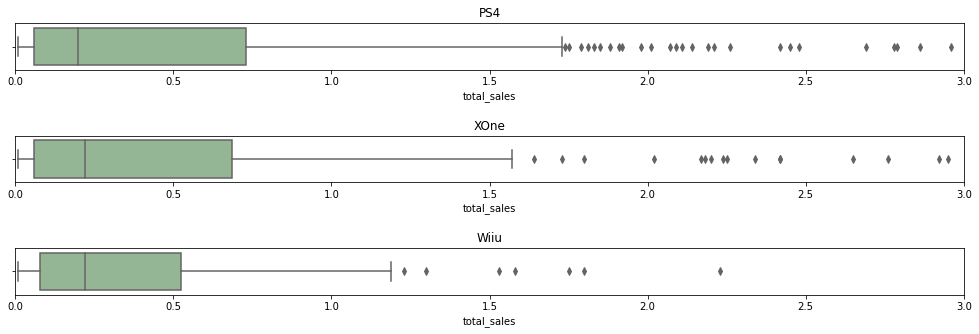

In [46]:
df.columns = ['index', 'name', 'platform', 'year_of_release', 'genre', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score',
       'rating', 'user_score_mean', 'total_sales']
df.drop(['index'], axis = 1)

df.index =  np.arange (len(df))
df.drop(['index'], axis = 1)

sales_ps4 = df.query('year_of_release >= 2005 & platform == "PS4"')['total_sales']
sales_xone = df.query('year_of_release >= 2005 & platform == "XOne"')['total_sales']
sales_wiiu = df.query('year_of_release >= 2005 & platform == "WiiU"')['total_sales']


plt.figure(figsize=(17,5))
plt.subplots_adjust(hspace=1.4)
plt.subplot(3, 1, 1)
plt.xlim(right=3)
sns.boxplot(sales_ps4, color = 'darkseagreen')
plt.title('PS4')

plt.subplot(3, 1, 2)
plt.xlim(right=3)
sns.boxplot(sales_xone, color = 'darkseagreen')
plt.title('XOne')

plt.subplot(3, 1, 3)
plt.xlim(right=3)
sns.boxplot(sales_wiiu, color = 'darkseagreen')
plt.title('Wiiu')

plt.show()

#df = df.drop(['index'], axis = 1)
#df.reset_index()

a1=a[['kCH4_sync','week_days']]
ax = a1.boxplot(by='week_days', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False, return_type='axes')
a2 = a[['CH4_sync','week_days']]
a2.boxplot(by='week_days', meanline=True, showmeans=True, showcaps=True, 
           showbox=True, showfliers=False, ax=ax)

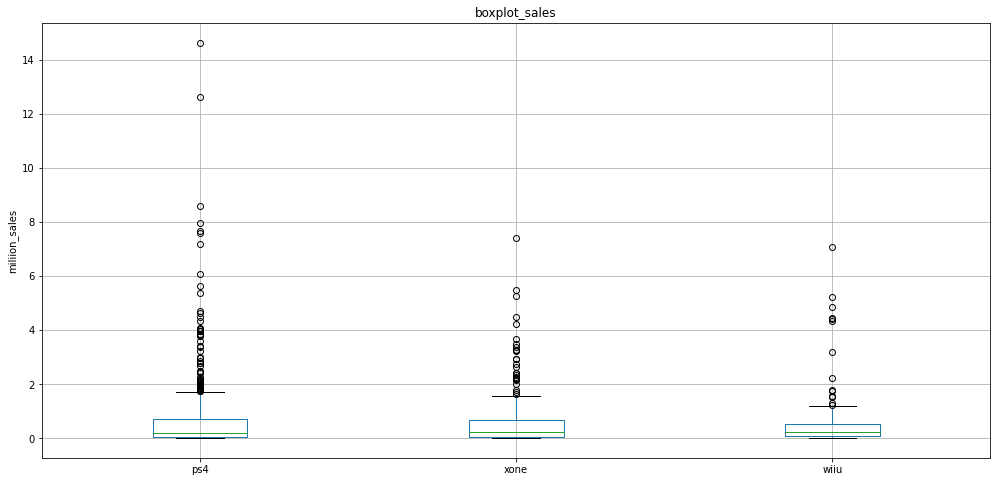

In [47]:
boxplot_frame = pd.concat([sales_ps4,sales_xone,sales_wiiu], join = 'outer', axis = 1)
boxplot_frame.columns = ['ps4','xone','wiiu']

plt.figure(figsize=(17,8))
plt.title('boxplot_sales')
plt.ylabel('miliion_sales')
boxplot_frame.boxplot()

plt.show()

***Промежуточный вывод*** Анализ размаха данных по перспективным платформам показал, сопоставимые медианные значения продаж. При этом вероятные бестселлеры платформ PS4, XOne создают ширину размаха по продажам и, как следствие, высокие суммарные и среднеарифметические значения. При этом платформа несмотря на сравнительно низкие показатели суммарной реализации Wiiu даёт более стабильный и предсказуемый результат с небольшим размахом и минимальными выбросами.

Оценим влияние рейтинга на продажи. Для этого сделаем запрос из фрейма по соответствующему услови

In [48]:
ps4_2005 = df.query('platform == "PS4" & year_of_release >= 2005')
ps4_2005.corr()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score_mean,total_sales
index,1.000000,0.403478,-0.571834,-0.539874,-0.362466,-0.586871,0.070961,-0.475973,0.069198,-0.587864
year_of_release,0.403478,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,0.112309,-0.033614,0.111802,-0.235032
na_sales,-0.571834,-0.248961,1.000000,0.785362,0.472981,0.944259,-0.152004,0.399110,-0.153656,0.928160
eu_sales,-0.539874,-0.208306,0.785362,1.000000,0.464563,0.944698,-0.159060,0.332401,-0.160542,0.958157
jp_sales,-0.362466,-0.060993,0.472981,0.464563,1.000000,0.496467,0.102102,0.318601,0.099866,0.527129
other_sales,-0.586871,-0.234796,0.944259,0.944698,0.496467,1.000000,-0.164608,0.392042,-0.166263,0.998051
critic_score,0.070961,0.112309,-0.152004,-0.159060,0.102102,-0.164608,1.000000,0.472372,0.999713,-0.159062
user_score,-0.475973,-0.033614,0.399110,0.332401,0.318601,0.392042,0.472372,1.000000,0.470928,0.389949
user_score_mean,0.069198,0.111802,-0.153656,-0.160542,0.099866,-0.166263,0.999713,0.470928,1.000000,-0.160775
total_sales,-0.587864,-0.235032,0.928160,0.958157,0.527129,0.998051,-0.159062,0.389949,-0.160775,1.000000


Присутствует слабая корелляция Пирсона (0.39) между рейтингом и величиной выручки. Это говорит о присутствии влияния положительных оценок от величины продаж.

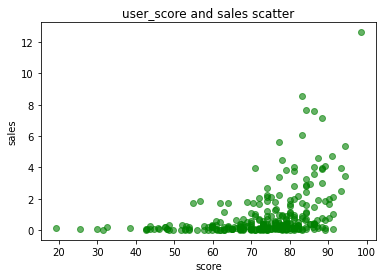

In [49]:

plt.scatter(x = ps4_2005['user_score'], y = ps4_2005['total_sales'], color = 'green', alpha = 0.6)

plt.title('user_score and sales scatter')
plt.xlabel('score')
plt.ylabel('sales')

plt.show()

Данные показывают зависимость оценки от цены, при этом выброс (верхний левый угол) - феномен сверхпопулярности GTA-5. Это аномалия подтверждающая предположение. Как видно на графике - игры с низким рейтингом не делают выручку.

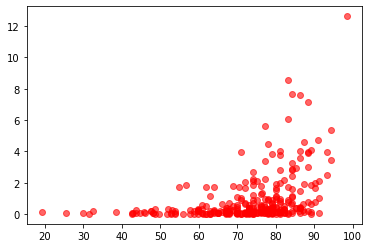

In [50]:
ps4_2005['critic_score'] = ps4_2005['critic_score']*10
plt.scatter(x = ps4_2005['user_score'], y = ps4_2005['total_sales'], color = 'red', alpha = 0.6)

plt.show()

Как видно, критики показывают похожее рассеяние. GTA5 также на месте.

Для соотнесения этого предположения с другими платформами, найдём коэффициенты корелляции Пирсона для XOne и WiiU

In [51]:
xone_2005 = df.query('platform == "XOne" & year_of_release >= 2005')
xone_2005.corr()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score_mean,total_sales
index,1.000000,0.355203,-0.547957,-0.526000,-0.225341,-0.571041,0.022869,-0.500501,0.046341,-0.571997
year_of_release,0.355203,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.126919,0.024853,0.140614,-0.239183
na_sales,-0.547957,-0.242667,1.000000,0.765367,0.425725,0.988088,-0.157228,0.377418,-0.169168,0.970433
eu_sales,-0.526000,-0.194925,0.765367,1.000000,0.421071,0.852986,-0.129749,0.370575,-0.140747,0.898045
jp_sales,-0.225341,-0.127050,0.425725,0.421071,1.000000,0.441717,0.050632,0.202911,0.043380,0.452701
other_sales,-0.571041,-0.243414,0.988088,0.852986,0.441717,1.000000,-0.159040,0.400022,-0.171309,0.995238
critic_score,0.022869,0.126919,-0.157228,-0.129749,0.050632,-0.159040,1.000000,0.476380,0.999684,-0.157854
user_score,-0.500501,0.024853,0.377418,0.370575,0.202911,0.400022,0.476380,1.000000,0.471978,0.404146
user_score_mean,0.046341,0.140614,-0.169168,-0.140747,0.043380,-0.171309,0.999684,0.471978,1.000000,-0.170257
total_sales,-0.571997,-0.239183,0.970433,0.898045,0.452701,0.995238,-0.157854,0.404146,-0.170257,1.000000


In [52]:
wiiu_2005 = df.query('platform == "WiiU" & year_of_release >= 2005')
wiiu_2005.corr()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score_mean,total_sales
index,1.000000,0.207170,-0.463960,-0.505328,-0.332335,-0.478675,-0.308696,-0.475579,-0.274281,-0.464195
year_of_release,0.207170,1.000000,-0.040385,-0.013585,0.031670,-0.014133,0.086424,0.040915,0.111855,-0.016573
na_sales,-0.463960,-0.040385,1.000000,0.958772,0.808387,0.994516,0.381043,0.349033,0.362051,0.982155
eu_sales,-0.505328,-0.013585,0.958772,1.000000,0.860098,0.976412,0.413020,0.380803,0.394227,0.984567
jp_sales,-0.332335,0.031670,0.808387,0.860098,1.000000,0.824345,0.356608,0.268819,0.342588,0.895940
other_sales,-0.478675,-0.014133,0.994516,0.976412,0.824345,1.000000,0.399857,0.364926,0.380664,0.988421
critic_score,-0.308696,0.086424,0.381043,0.413020,0.356608,0.399857,1.000000,0.774258,0.999685,0.398746
user_score,-0.475579,0.040915,0.349033,0.380803,0.268819,0.364926,0.774258,1.000000,0.772670,0.352575
user_score_mean,-0.274281,0.111855,0.362051,0.394227,0.342588,0.380664,0.999685,0.772670,1.000000,0.380249
total_sales,-0.464195,-0.016573,0.982155,0.984567,0.895940,0.988421,0.398746,0.352575,0.380249,1.000000


***Промежуточный вывод:*** Анализ корелляций Пирсона на платформах XOne и WiiU показал, похожие результаты (0.4 и 0.35 соответственно). Это говорит о присутствии связи между оценкой пользователями продуктов и продажами.

In [53]:
df_2005 = df.query('year_of_release >= 2005').pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum' , 'mean']).reset_index()
df_2005.columns = ['genre','sum_sales','mean_sales']
df_2005.sort_values(by = 'sum_sales', ascending = False)

,genre,sum_sales,mean_sales
0,Action,1202.04,0.466993
10,Sports,853.33,0.617460
8,Shooter,758.56,0.910636
3,Misc,615.83,0.450168
7,Role-Playing,550.78,0.516195
6,Racing,355.03,0.556473
4,Platform,303.06,0.716454
9,Simulation,269.62,0.418665
2,Fighting,208.07,0.456294
1,Adventure,149.81,0.140667


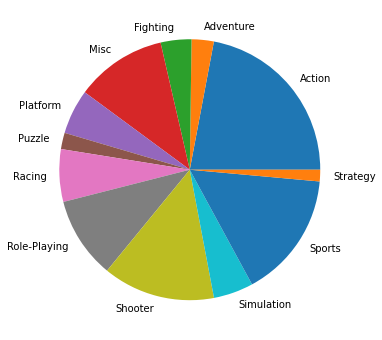

In [54]:
plt.figure(figsize=(6,6))
plt.pie(df_2005['sum_sales'], labels = df_2005['genre'])

plt.show()

Как видно из графика (выше) основной жанр, приносящий больше всего выручки - Action. Затем расположились Shooter и Sports. Очевидно, что эти жанры отражают общие предпочтения рынка сбыта. 

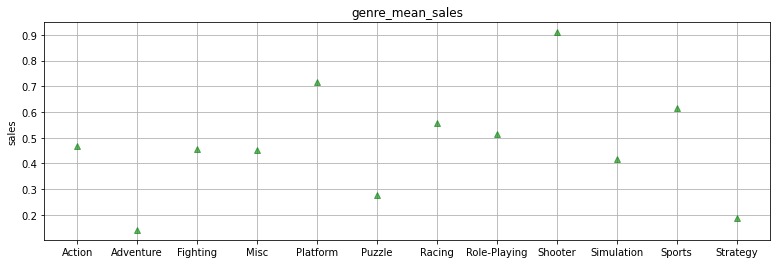

In [77]:

plt.figure(figsize=(13,4))
plt.grid()
plt.title('genre_mean_sales')
plt.ylabel('sales')
plt.plot(df_2005['genre'],df_2005['mean_sales'], '^', color = 'green', alpha = 0.6)
plt.show()

Среди прочего, стоит отметить среднюю выручку по продуктам: наибольшая средняя величина - Shooter, затем расположились Platform, Sports, Racing, Roleplaying. Разработчикам следует обратить внимание на эти жанры.

**Рассмотрим самые низкие показатели средней выручки и суммарной выручки:**

In [56]:
print ('Платформы по стратегиям')
print (df.query('genre == "Strategy" & year_of_release > 2005')['platform'].value_counts().head(5))
print ('Платформы по приключениям')
print  ( df.query('genre == "Adventure" & year_of_release > 2005')['platform'].value_counts().head(5))
print ('Платформы по паззлу')
print ( df.query('genre == "Puzzle" & year_of_release > 2005')['platform'].value_counts().head(5))



Платформы по стратегиям
PC      130
DS       73
PSP      54
X360     27
PS2      27
Name: platform, dtype: int64
Платформы по приключениям
DS     231
PSP    210
PS2    140
PSV     93
Wii     82
Name: platform, dtype: int64
Платформы по паззлу
DS     212
Wii     54
PSP     31
PC      25
3DS     20
Name: platform, dtype: int64


Самые низкие показатели выручки распространены на платформах PC и DS. Очевидно присутствуют факторы сложностей в монетизации на этих платформах.

СОСТАВЛЕНИЕ ПОРТРЕТА ПОЛЬЗОВАТЕЛЯ Определите для пользователя каждого региона (NA, EU, JP):

Определим самые популярные платформы исходя из гео

In [57]:
na_sales_2005 = df.query('year_of_release > 2005').pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index().head(5)
jp_sales_2005 = df.query('year_of_release > 2005').pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index().head(5)
eu_sales_2005 = df.query('year_of_release > 2005').pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index().head(5)

na_sales_2005_sum = df.query('year_of_release > 2005')['na_sales'].sum()
jp_sales_2005_sum = df.query('year_of_release > 2005')['jp_sales'].sum()
eu_sales_2005_sum = df.query('year_of_release > 2005')['eu_sales'].sum()


In [58]:
na_sales_2005['part'] = na_sales_2005['na_sales'] / na_sales_2005_sum
jp_sales_2005['part'] = jp_sales_2005['jp_sales'] / jp_sales_2005_sum
eu_sales_2005['part'] = eu_sales_2005['eu_sales'] / eu_sales_2005_sum

Рассмотрим рейтинг и доли на рынке различных платформ по регионам

In [59]:
print ('North America')
display(na_sales_2005)
print ('Japan')
display(jp_sales_2005)
print ('Europe')
display(eu_sales_2005)

North America


,platform,na_sales,part
0,X360,588.84,0.246720
1,Wii,486.87,0.203996
2,PS3,390.13,0.163462
3,DS,323.99,0.135750
4,PS2,114.89,0.048138


Japan


,platform,jp_sales,part
0,DS,141.49,0.252071
1,3DS,100.62,0.179259
2,PS3,79.41,0.141473
3,PSP,70.63,0.125831
4,Wii,68.28,0.121644


Europe


,platform,eu_sales,part
0,PS3,327.20,0.218718
1,X360,267.89,0.179072
2,Wii,258.32,0.172675
3,DS,142.99,0.095582
4,PS4,141.09,0.094312


na_sales


,platform,na_sales,part
0,X360,588.84,0.246720
1,Wii,486.87,0.203996
2,PS3,390.13,0.163462
3,DS,323.99,0.135750
4,PS2,114.89,0.048138


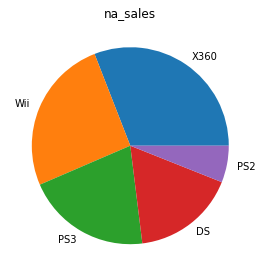

jp_sales


,platform,jp_sales,part
0,DS,141.49,0.252071
1,3DS,100.62,0.179259
2,PS3,79.41,0.141473
3,PSP,70.63,0.125831
4,Wii,68.28,0.121644


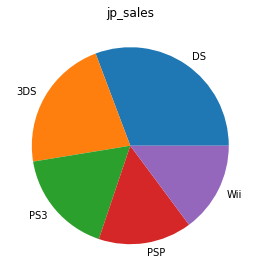

eu_sales


,platform,eu_sales,part
0,PS3,327.20,0.218718
1,X360,267.89,0.179072
2,Wii,258.32,0.172675
3,DS,142.99,0.095582
4,PS4,141.09,0.094312


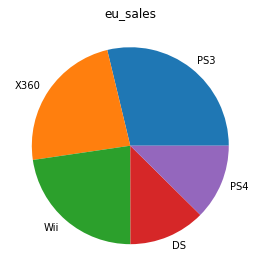

In [60]:
geo_sale_list = ['na_sales','jp_sales','eu_sales'] #лист продаж для цикла


for each_sales in geo_sale_list: #сделал сводную по платформам, затем сумму по платформе локальную - sum_platform, затем столбик с долей.
   
    pivot_platform = df.query('year_of_release > 2005').pivot_table(index = 'platform', values = each_sales, aggfunc = 'sum').sort_values(by = each_sales, ascending = False).reset_index().head(5)
    sum_platform = df[df['year_of_release'] > 2005][each_sales].sum()
    pivot_platform['part'] = pivot_platform[each_sales] / sum_platform
    
    plt.figure(figsize = (15,15))
    plt.subplot(1, 3, 1)
    plt.pie(pivot_platform[each_sales], labels = pivot_platform['platform'])
    plt.title(each_sales)
    print (each_sales)
    display (pivot_platform)
    plt.show()
    

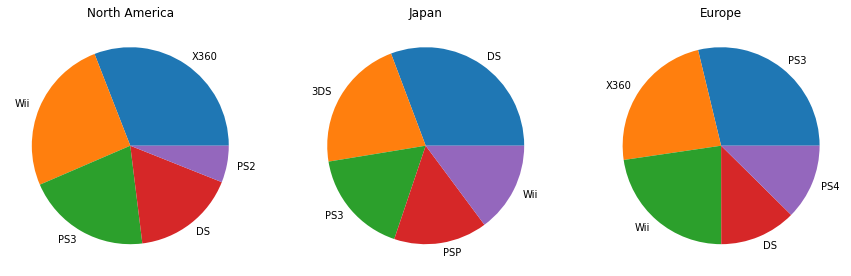

In [61]:
plt.figure(figsize=(15,7))
plt.title('Platforms in regions')
plt.subplot(1, 3, 1)
plt.pie(na_sales_2005['na_sales'], labels = na_sales_2005['platform'])
plt.title('North America')

plt.subplot(1, 3, 2)
plt.pie(jp_sales_2005['jp_sales'], labels = jp_sales_2005['platform'])
plt.title('Japan')

plt.subplot(1, 3, 3)
plt.pie(eu_sales_2005['eu_sales'], labels = eu_sales_2005['platform'])
plt.title('Europe')

plt.show()

***Промежуточный вывод:*** Как видно - различные регионы имеют абсолютно разные предпочтения в консолях. В выборе платформ в  Японии прослеживается патриотизм, американцы на первое место ставят отечественный Xbox и другие (иностранные) консоли, европейцы больше предпочитают Японскую технику, однако XOne также на первом месте.

Рассмотрим жанровые предпочтения в различных регионах

In [62]:
na_genres = df.query('year_of_release > 2005').pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index().head(5)
jp_genres = df.query('year_of_release > 2005').pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index().head(5)
eu_genres = df.query('year_of_release > 2005').pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index().head(5)


In [63]:
print('North America')
display (na_genres)
print('Japan')
display (jp_genres)
print('Europe')
display (eu_genres)

North America


,genre,na_sales
0,Action,530.44
1,Sports,396.64
2,Shooter,373.13
3,Misc,285.06
4,Role-Playing,199.63


Japan


,genre,jp_sales
0,Role-Playing,170.38
1,Action,102.07
2,Misc,64.53
3,Sports,48.97
4,Platform,35.20


Europe


,genre,eu_sales
0,Action,350.70
1,Sports,251.54
2,Shooter,238.89
3,Misc,146.88
4,Racing,113.39


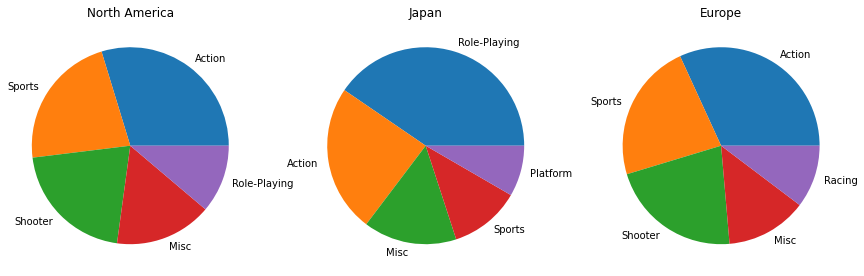

In [64]:

plt.figure(figsize=(15,7))

plt.subplot(1, 3, 1)
plt.pie(na_genres['na_sales'], labels = na_genres['genre'])
plt.title('North America')

plt.subplot(1, 3, 2)
plt.pie(jp_genres['jp_sales'], labels = jp_genres['genre'])
plt.title('Japan')

plt.subplot(1, 3, 3)
plt.pie(eu_genres['eu_sales'], labels = eu_genres['genre'])
plt.title('Europe')

plt.show()

***Промежуточный вывод:*** Из круговых диаграмм видно, что выбор жанров в Европе и Америке очень близок. Выбор жанров в Японии существенно отличается. "Японский выбор" в пользу RPG интересен по особенностям общественного устройства (коллективизм). Размытая общественная роль (самоощущение) требует компенсации - в этом иногда помогает RPG.

Оценка влияния рейтинга ESRB в отдельном регионе:

In [65]:
rating_na = df.query('year_of_release > 2005').pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').reset_index()
rating_jp = df.query('year_of_release > 2005').pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').reset_index()
rating_eu = df.query('year_of_release > 2005').pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').reset_index()

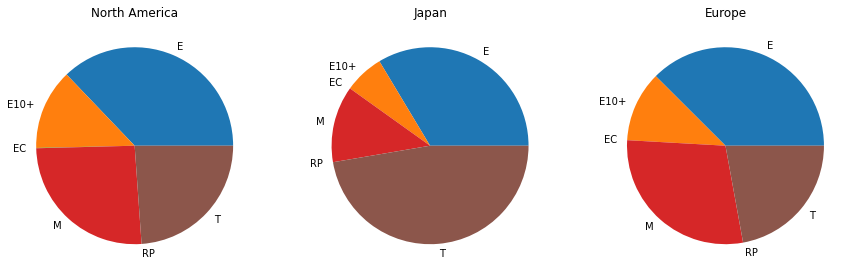

In [66]:
plt.figure(figsize=(15,7))

plt.subplot(1, 3, 1)
plt.pie(rating_na['na_sales'], labels = rating_na['rating'])
plt.title('North America')

plt.subplot(1, 3, 2)
plt.pie(rating_jp['jp_sales'], labels = rating_jp['rating'])
plt.title('Japan')

plt.subplot(1, 3, 3)
plt.pie(rating_eu['eu_sales'], labels = rating_eu['rating'])
plt.title('Europe')

plt.show()

Продажи продуктов в Европе и Северной Америке в зависимости от рейтинга ESRB очень похожи, чего нельзя сказать о Японии. Япония, после Е-рейтинга в большей степени предпочитает рейтинг T, в то время как Европа и Америка предпочитает после E-рейтинга, рейтинг - М. Либерализм и вседозволенность.

### Вывод

Исследовательский анализ проведён успешно:
- В целом оценка рынка игровых платформ показывает довольно большой жизненный цикл платформ, который позволяет строить планы и продуктовые стратегии. 
- Пользовательские оценки важны, однако их влияние на продажи не так сильно, как могло показаться перед исследованием (корелляция 0,4).
- Многообразие и конкуренция платформ в начале нулевых сменяется монополией 2х монстров - Sony и  Microsoft. 
- Иные платформы в значительной степени отстают. 
- Что касается предпочтений жанра, платформы, рейтингов - Америка и Европа похожи, Япония - особенная почти во всём. 
- Япония покупает только японские платформы и играет RPG, Америка и Европа любит Экшны и покупают всё подряд.

## Выдвижение и проверка гипотез

Для проверки предположений из условия будем выдвигать пары гипотез: нулевую и альтернативную. Нулевую будем принимать как предположение равенства средних массивов, альтернативную - напротив.

**Первая пара гипотез**
- H0 = Средние пользовательские рейтинги платформ Xbox One и PC ***одинаковые***
- H1 = Средние пользовательские рейтинги платформ Xbox One и PC ***разные***

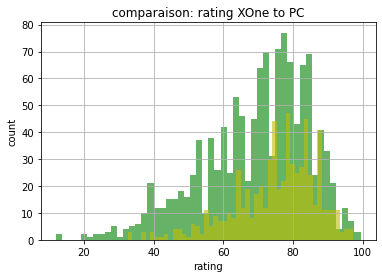

In [67]:
df_more_2005 = df.query('year_of_release > 2005')
xbox_df = df_more_2005.query('platform == "XOne" or platform == "X360" or platform =="XB" ')
pc_df = df_more_2005.query('platform == "PC"')

plt.title('comparaison: rating XOne to PC')

plt.ylabel('count')
plt.xlabel('rating')
xbox_df['user_score'].hist(bins = 50, alpha = 0.6, color = 'g')
pc_df['user_score'].hist(bins = 50, alpha = 0.6, color = 'y')

plt.show()

Распределение - скошено влево, для проверки используем тест стьюдента и тест Левене для оценки вероятности равенства дисперсий.

In [68]:


print('Дисперсия по Xbox',np.var(xbox_df['user_score'], ddof = 1))
print('Дисперсия по PC',np.var(pc_df['user_score'], ddof = 1))




stat, p = levene(xbox_df['user_score'].dropna(), pc_df['user_score'].dropna(), center = 'median')
print ('pvalue по тесту Левене',p)

Дисперсия по Xbox 234.35170948913623
Дисперсия по PC 140.26747797700284
pvalue по тесту Левене 1.4421105246045096e-11


P-value по тесту Левене показало исчезающе малое значение, ниже 0,05. При проведении теста Стьюдента примем значение equal_var равное False.

In [69]:
ttest_xbox_pc = st.ttest_ind(xbox_df['user_score'].dropna(), pc_df['user_score'].dropna(), equal_var = False)
print('p-значение', ttest_xbox_pc.pvalue)
alpha = 0.05

if (ttest_xbox_pc.pvalue < alpha) :
    print("Отвергаем нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC, вероятно, разные")
else:
    print('Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC могут быть равны') 

p-значение 3.478827601625053e-18
Отвергаем нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC, вероятно, разные


Гипотеза о равенстве не нашла подтверждение p-value теста стьюдента составило исчезающе малую величину.

**Вторая пара гипотез:**
- H0 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») ***одинаковы.***
- H1 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») ***разные.***

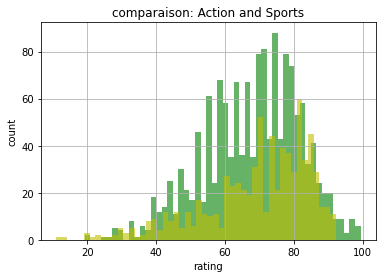

In [70]:
action_df = df_more_2005.query('genre == "Action"')
sports_df = df_more_2005.query('genre == "Sports"')

plt.title('comparaison: Action and Sports')

plt.ylabel('count')
plt.xlabel('rating')

action_df['user_score'].hist(bins = 50, alpha = 0.6, color = 'g')
sports_df['user_score'].hist(bins = 50, alpha = 0.6, color = 'y')

plt.show()

In [71]:
print('Дисперсия по Xbox',np.var(action_df['user_score'], ddof = 1))
print('Дисперсия по PC',np.var(sports_df['user_score'], ddof = 1))

Дисперсия по Xbox 194.35743861810838
Дисперсия по PC 236.0057596423614


In [72]:
stat, p = levene(action_df['user_score'].dropna(), sports_df['user_score'].dropna(), center = 'median') #распределение ненормальное, с хвостом, примем параметр center как median 
print ('pvalue по тесту Левене',p)

pvalue по тесту Левене 0.1454935018174367


P-value по тесту Левене показало значение, выше 0,05. При проведении теста Стьюдента примем значение equal_var равное True.

In [73]:
ttest_action_sports = st.ttest_ind(action_df['user_score'].dropna(), sports_df['user_score'].dropna(), equal_var = True)
print('p-значение', ttest_action_sports.pvalue)


if (ttest_action_sports.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports, вероятно, разные")
else:
    print('Не получилось отвергнуть нулевую гипотезу, cредние пользовательские  рейтинги жанров Action и Sports могут быть равны') 

p-значение 0.031482605224395506
Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports, вероятно, разные


### Вывод

Анализ гипотез показал:

- первое предположение из условия о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не нашло статистического подтверждения.

- второе предположение о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - оказалось верно, однако с оговоркой: при  alpha в более "либеральном" пороге - нулевая гипотеза о равенстве Action и Sports могла быть НЕ отвергнутой и предположение из условия оказалось бы ложным.

## Общий вывод

Исследовательский и статистический анализы показали следующие основные результаты:
- платформы живут в среднем 10 лет, выбирать продукты для рекламирования следует исходя из этапа жизненного цикла продукта
- смотреть данные исходя из жизненного цикла целесообразно за последних 10 полных лет (с 2005 года)
- предпочтения в разных странах разные: в Японии нужно продавать продукты для Японских консолей, в Европе и Америке можно продавать разное
- популярность жанров обусловлена географией - в Японии многое отличается от Америки и Европы (РПГ в японии в разы популярнее)
- рейтинги ESRB также в японии отличаются и популярность продуктов во многом от них зависит. Америка и Европа опять близнецы, Япония отличается.
- Сосредоточить рекламу нужно в 3х основных точках: PS4, XOne, WiiU. Расходы на рекламу нужно бюджетировать исходя из того, что популярные платформы PS4 и Xone имеют большую непредсказуемость (размах) нежели Wiiu. Однако вместе с риском и неопределённостью у PS4 XOne огромные перспективы роста в ближайшие 4 года (исходя из среднего жизненного цикла 10 лет).
